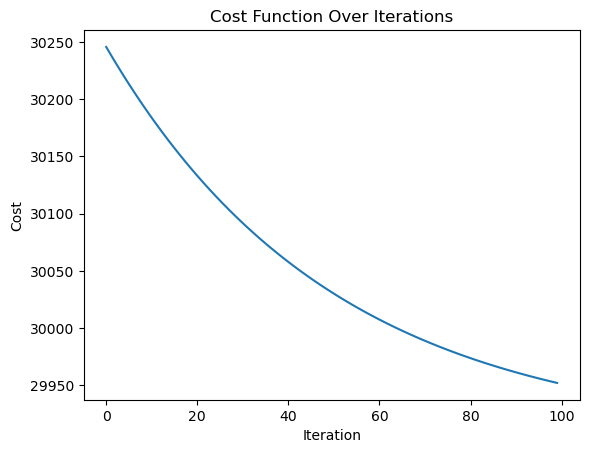

In [22]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 

df = pd.read_csv('kangaroo.csv')

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values.reshape(-1, 1)

X = np.reshape(df.X, (-1, 1))
y = np.reshape(df.Y, (-1, 1))

# Normalize X, preventing overflow which was occuring
X = (X - np.mean(X)) / np.std(X)

# Define the gradient descent function
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros((n,1))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        theta = theta - (1/m) * learning_rate * X.T.dot(error)
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Define the cost computation function
def compute_cost(X, y, theta):
    m = len(y)
    prediction = np.dot(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(prediction - y))
    return cost

# Train the model using gradient descent
theta, cost_history = gradient_descent(X, y, learning_rate=0.01, iterations=100)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()